Techniques/questions to look at with this particular exmaple:

+ How to merge datasets and different merge techniques
+ List of movies that are rated most by users
+ In ratings, how to address ratings sparsity problem
+ Plot distributions
+ Identify different age groups and technique of binning
+ Subgrouping and unstacking
+ Differences in ratings by gender

In [2]:
import pandas as pd
import numpy as np

In [3]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('C:/Users/welcome/Downloads/PreTerm2/Session 5/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('C:/Users/welcome/Downloads/PreTerm2/Session 5/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('C:/Users/welcome/Downloads/PreTerm2/Session 5/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

In [3]:
users.shape

(943, 5)

In [4]:
users.head(10)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [5]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [7]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [6]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [8]:
#Selecting a subset of columns
movies[['movie_id','title']].head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
#Another example of subsetting
users[users.age<40].tail(10)

,user_id,age,sex,occupation,zip_code
926,927,23,M,programmer,55428
927,928,21,M,student,55408
929,930,28,F,scientist,07310
932,933,28,M,student,48105
935,936,24,M,other,32789
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
942,943,22,M,student,77841


In [10]:
users[(users.age < 40) & (users.sex == 'F')].head(3)

,user_id,age,sex,occupation,zip_code
4,5,33,F,other,15213
10,11,39,F,other,30329
11,12,28,F,other,06405


In [11]:
ratings.describe()

,user_id,movie_id,rating,unix_timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [12]:
#Merge datasets
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [13]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [14]:
#Let us answer some simple questions now. 
#Most rated movies
most_rated = lens.groupby('title').size()
most_rated.head(10)

title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
dtype: int64

In [15]:
lens.title.value_counts()[:20]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [16]:
#Highest rated movies
highest_ratings = lens.groupby('title').agg({'rating':[np.size,np.mean]})
highest_ratings.head(10)

rating          
                                              size      mean
title                                                       
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847

In [20]:
highest_ratings.sort_values([('rating', 'mean')], ascending=False).head(10)

rating     
                                                    size mean
title                                                        
They Made Me a Criminal (1939)                         1  5.0
Marlene Dietrich: Shadow and Light (1996)              1  5.0
Saint of Fort Washington, The (1993)                   2  5.0
Someone Else's America (1995)                          1  5.0
Star Kid (1997)                                        3  5.0
Great Day in Harlem, A (1994)                          1  5.0
Aiqing wansui (1994)                                   1  5.0
Santa with Muscles (1996)                              2  5.0
Prefontaine (1997)                                     3  5.0
Entertaining Angels: The Dorothy Day Story (1996)      1  5.0

In [24]:
atleast_100 = highest_ratings['rating']['size'] >= 200
#atleast_100
highest_ratings[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Schindler's List (1993)                   298  4.466443
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
Godfather, The (1972)                     413  4.283293
Raiders of the Lost Ark (1981)            420  4.252381
Titanic (1997)                            350  4.245714
Empire Strikes Back, The (1980)           367  4.204360
Boot, Das (1981)                          201  4.203980
Godfather: Part II, The (1974)            209  4.186603

In [25]:
import matplotlib.pyplot as plt


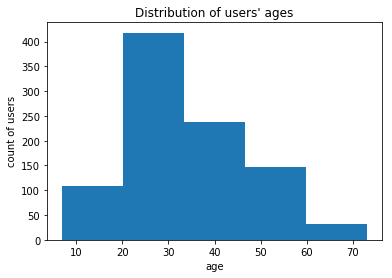

In [26]:
plt.hist(users.age,bins=5)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [27]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens['age_group'].head()

0    60-69
1    60-69
2    60-69
3    60-69
4    60-69
Name: age_group, dtype: category
Categories (8, object): [0-9 < 10-19 < 20-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70-79]

In [28]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})


rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [30]:
most_100 = lens.groupby('movie_id').size()[:100]


In [31]:
lens.set_index('movie_id', inplace=True)


In [32]:
by_age = lens.loc[most_100.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)


title                              age_group
Ace Ventura: Pet Detective (1994)  10-19        3.100000
                                   20-29        3.089286
                                   30-39        3.086957
                                   40-49        2.636364
                                   50-59        3.000000
                                   60-69        4.000000
Aladdin (1992)                     10-19        3.840000
                                   20-29        3.820000
                                   30-39        3.847458
                                   40-49        3.769231
                                   50-59        3.571429
                                   60-69        3.500000
Angels and Insects (1995)          10-19        4.000000
                                   20-29        2.960000
                                   30-39        3.388889
Name: rating, dtype: float64

In [33]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]


age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.0
Blade Runner (1982),0.0,3.400000,4.134454,4.211765,4.147059,4.136364,4.400000,0.0
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.0
Brother Minister: The Assassination of Malcolm X (1994),0.0,0.000000,3.333333,0.000000,2.500000,0.000000,0.000000,0.0
"Brothers McMullen, The (1995)",0.0,3.750000,3.529412,3.333333,3.375000,3.000000,4.500000,3.0
Carlito's Way (1993),0.0,4.500000,3.538462,3.200000,3.750000,3.000000,2.000000,0.0
Clerks (1994),0.0,4.727273,3.825000,3.750000,3.250000,3.333333,4.333333,3.0
Copycat (1995),0.0,3.400000,3.243243,3.333333,3.285714,3.333333,3.500000,0.0
Crimson Tide (1995),0.0,3.833333,3.492537,3.708333,3.750000,3.900000,3.400000,0.0


In [ ]:
lens.reset_index('movie_id', inplace=True)


In [34]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [35]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [36]:
pivoted.reset_index('movie_id', inplace=True)


In [37]:
disagreements = pivoted[pivoted.movie_id.isin(most_100.index)]['diff']
disagreements.head()

title
Toy Story (1995)     0.119994
GoldenEye (1995)    -0.189850
Four Rooms (1995)    0.420608
Get Shorty (1995)    0.191463
Copycat (1995)      -0.632102
Name: diff, dtype: float64

In [38]:
disagreements.describe()

count    100.000000
mean      -0.015862
std        0.447895
min       -2.333333
25%       -0.178594
50%       -0.013110
75%        0.198015
max        1.428571
Name: diff, dtype: float64

In [39]:
disagree = disagreements.copy()
disagree=disagree.sort_values()
disagree.head()

title
Faster Pussycat! Kill! Kill! (1965)                       -2.333333
Free Willy 2: The Adventure Home (1995)                   -1.133333
Robert A. Heinlein's The Puppet Masters (1994)            -0.964286
Free Willy (1993)                                         -0.818182
To Wong Foo, Thanks for Everything! Julie Newmar (1995)   -0.778378
Name: diff, dtype: float64

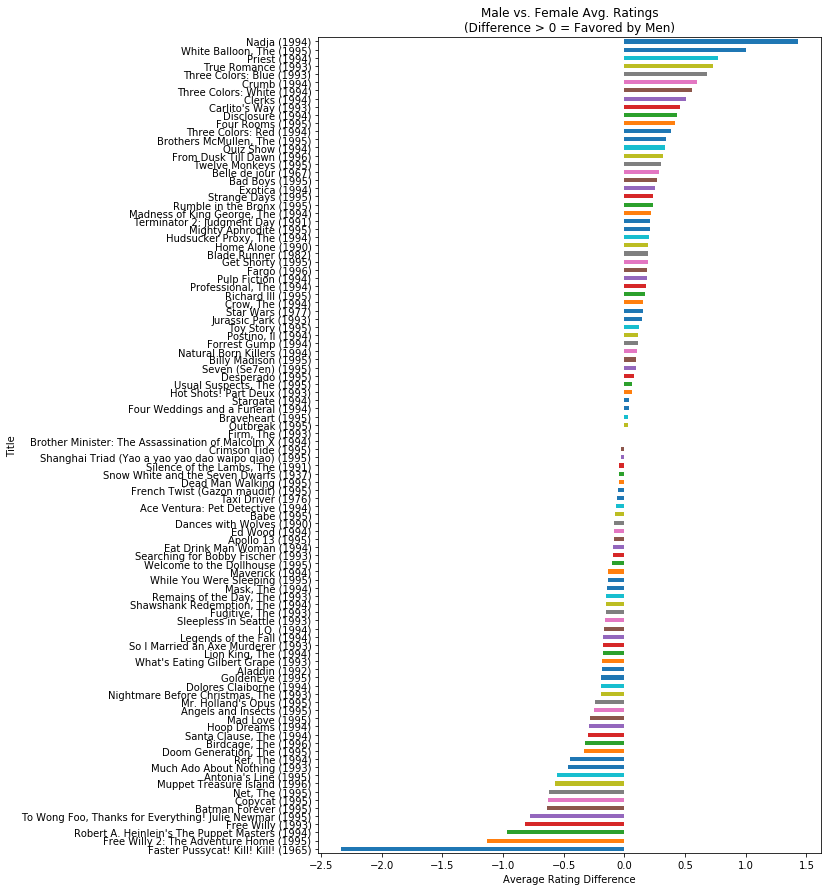

In [40]:
disagree.plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');